## 主成分分析 (PCA)

In [43]:
# 添加目录到系统路径方便导入模块，该项目的根目录为".../machine-learning-toy-code"
import sys
from pathlib import Path
curr_path = str(Path().absolute())
parent_path = str(Path().absolute().parent)
p_parent_path = str(Path().absolute().parent.parent)
sys.path.append(p_parent_path) 
print(f"主目录为：{p_parent_path}")

主目录为：/Users/johnjim/Desktop/machine-learning-toy-code


In [44]:
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [45]:
train_dataset = datasets.MNIST(root = p_parent_path+'/datasets/', train = True,transform = transforms.ToTensor(), download = False)
test_dataset = datasets.MNIST(root = p_parent_path+'/datasets/', train = False, 
                               transform = transforms.ToTensor(), download = False)

batch_size = len(train_dataset)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)
X_train,y_train = next(iter(train_loader))
X_test,y_test = next(iter(test_loader))
X_train,y_train = X_train.cpu().numpy(),y_train.cpu().numpy() # tensor转为array形式)
X_test,y_test = X_test.cpu().numpy(),y_test.cpu().numpy() # tensor转为array形式)
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)
m , p = X_train.shape # m：训练集数量，p：特征维度数
print(f"原本特征维度数：{p}") # 特征维度数为784

原本特征维度数：784


In [46]:
# n_components是>=1的整数时，表示期望PCA降维后的特征维度数
# n_components是[0,1]的数时，表示主成分的方差和所占的最小比例阈值，PCA类自己去根据样本特征方差来决定降维到的维度
model = PCA(n_components=0.95) 
lower_dimensional_data = model.fit_transform(X_train)

In [47]:
print(f"降维后的特征维度数：{model.n_components_}")

降维后的特征维度数：154


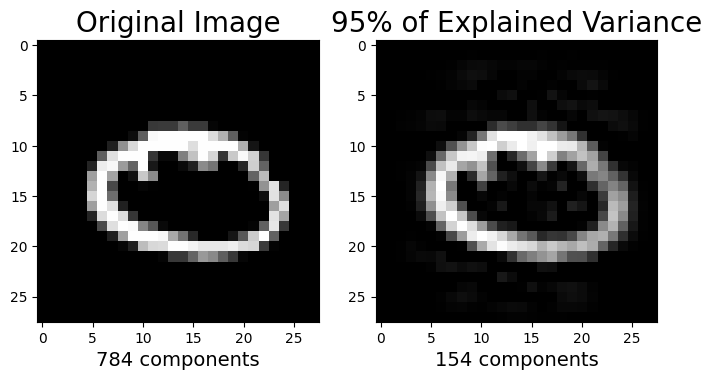

In [48]:
approximation = model.inverse_transform(lower_dimensional_data) # 降维后的数据还原
plt.figure(figsize=(8,4));

# 原始图片
plt.subplot(1, 2, 1);
plt.imshow(X_train[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel(f'{X_train.shape[1]} components', fontsize = 14)
plt.title('Original Image', fontsize = 20)
# 降维后的图片
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0,1));
plt.xlabel(f'{model.n_components_} components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20)
plt.show()

# 不同主成分个数对应的可解释方差分析(Explained Variance)

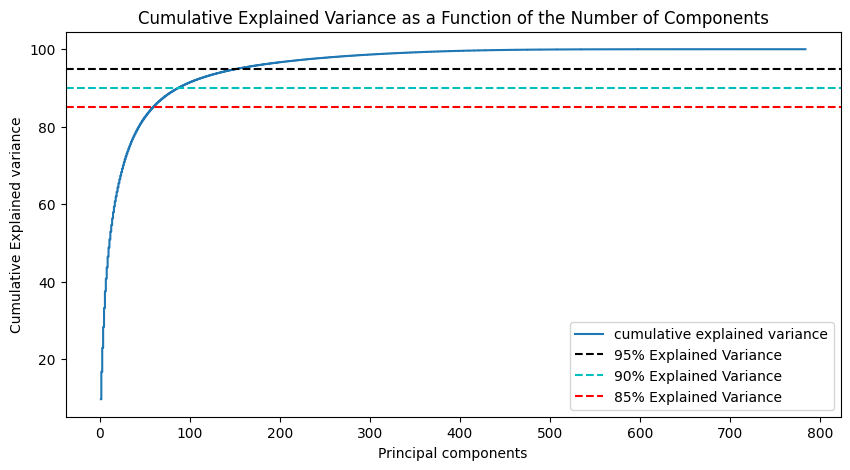

In [49]:
model = PCA() # 这里需要分析所有主成分，所以不降维
model.fit(X_train)
tot = sum(model.explained_variance_) 
var_exp = [(i/tot)*100 for i in sorted(model.explained_variance_, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(10, 5))
plt.step(range(1, p+1), cum_var_exp, where='mid',label='cumulative explained variance') # p：特征维度数
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

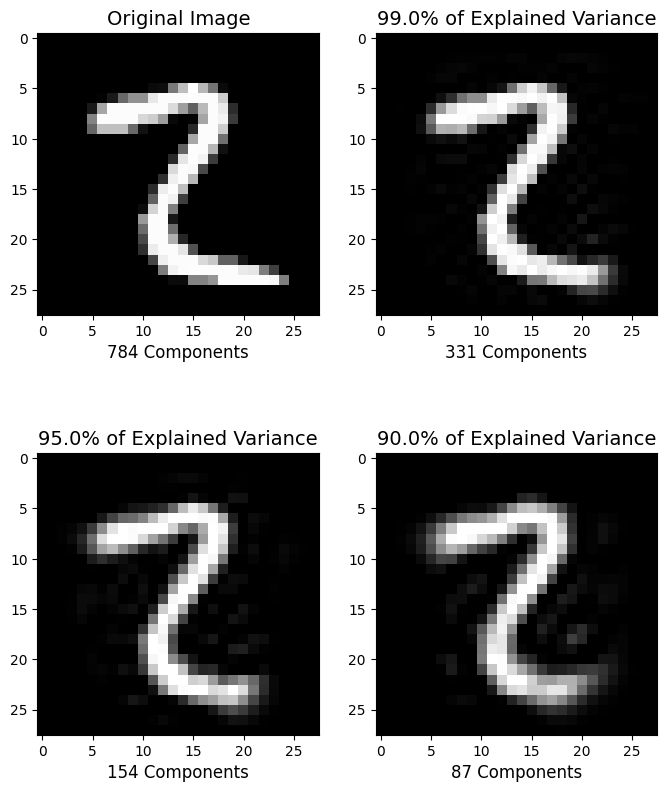

In [50]:

def explained_variance(percentage, images): 
    '''
       :param: percentage [float]: 降维的百分比
       :return: approx_original: 降维后还原的图片
       :return: model.n_components_: 降维后的主成分个数
    '''   
    model = PCA(percentage)
    model.fit(images)
    components = model.transform(images)
    approx_original = model.inverse_transform(components)
    return approx_original,model.n_components_
plt.figure(figsize=(8,10));
percentages = [784,0.99,0.95,0.90]
for i in range(1,5):
    plt.subplot(2,2,i)
    im, n_components = explained_variance(percentages[i-1], X_train)
    im = im[5].reshape(28, 28) # 重建成图片
    plt.imshow(im,cmap = plt.cm.gray, interpolation='nearest',clim=(0,1))
    plt.xlabel(f'{n_components} Components', fontsize = 12)
    if i==1:
        plt.title('Original Image', fontsize = 14)
    else:
        plt.title(f'{percentages[i-1]*100}% of Explained Variance', fontsize = 14)
plt.show()
